In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# survive  pclass sex age 


In [21]:

df = pd.read_csv('https://raw.githubusercontent.com/GTerrence/dataset/main/Titanic-Dataset.csv')
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# replace all nan in cabin to no-cabin:
df['Cabin'] = df['Cabin'].fillna('No-Cabin')


In [25]:
# impute null in Age and Cabin
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = pd.to_numeric(df['Cabin'], errors='coerce')
df['Cabin'] = df['Cabin'].fillna(-1)


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# label encode the sex male to 0 and female to 1
# Define a dictionary to map 'male' to 0 and 'female' to 1
sex_map = {'male': 0, 'female': 1}

# Replace the values in the 'Sex' column using the dictionary
df['Sex'] = df['Sex'].replace(sex_map)


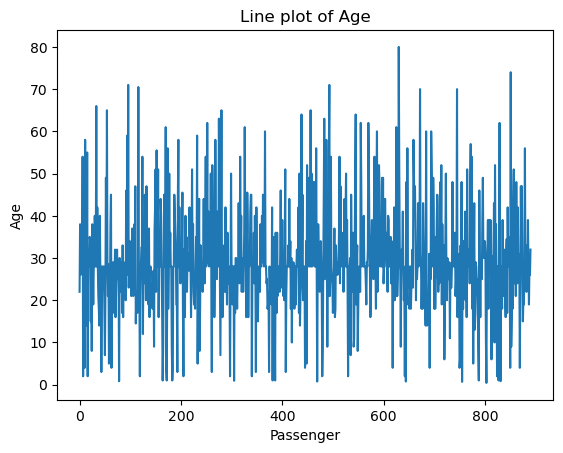

In [26]:
import matplotlib.pyplot as plt

# Create a line plot of the 'Age' column
df['Age'].plot(kind='line')

# Add labels and title
plt.xlabel('Passenger')
plt.ylabel('Age')
plt.title('Line plot of Age')
plt.show()


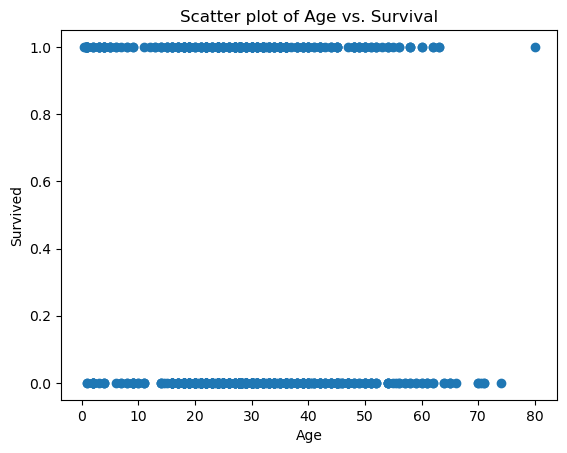

In [27]:
import matplotlib.pyplot as plt

# Create a scatter plot of age vs. survival status
plt.scatter(df['Age'], df['Survived'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Scatter plot of Age vs. Survival')
plt.show()


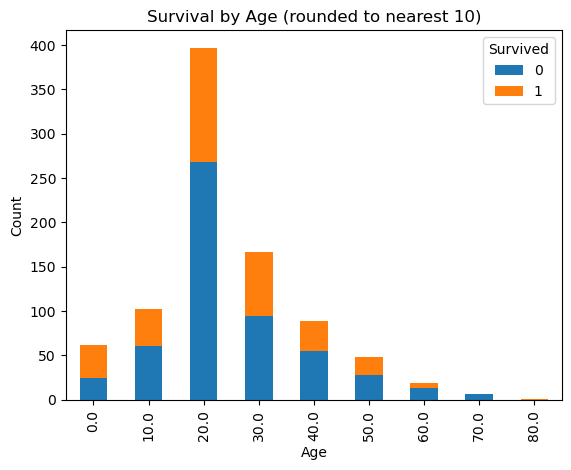

In [28]:
import matplotlib.pyplot as plt

# Round the age to the nearest 10
df['Age'] = (df['Age'] // 10) * 10

# Group the data by age and survival status
grouped = df.groupby(['Age', 'Survived'])

# Count the number of passengers in each group
counts = grouped.size().unstack()

# Plot the bar chart
counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival by Age (rounded to nearest 10)')
plt.show()


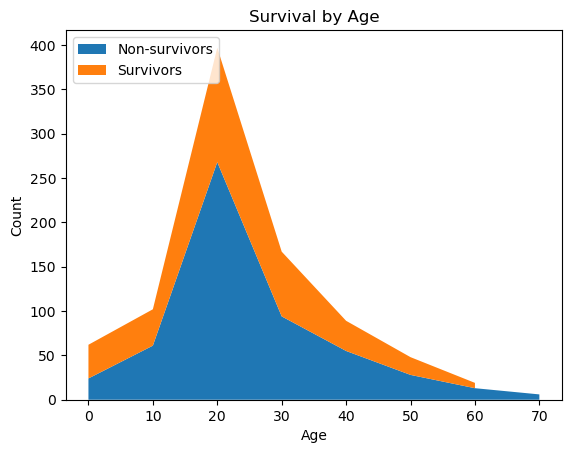

In [29]:
# Group the data by age and survival status
grouped = df.groupby(['Age', 'Survived'])

# Count the number of passengers in each group
counts = grouped.size().unstack()

# Calculate the proportion of survivors for each age
proportions = counts[1] / (counts[0] + counts[1])

# Create a stacked area chart of the proportion of survivors and non-survivors by age
plt.stackplot(counts.index, counts[0], counts[1], labels=['Non-survivors', 'Survivors'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival by Age')
plt.legend(loc='upper left')
plt.show()


In [33]:
# PassengerId      0
# Survived         0
# Pclass           0
# Name             0
# Sex              0
# Age            177
# SibSp            0
# Parch            0
# Ticket           0
# Fare             0
# Cabin          687
# Embarked         2
X = df[["Age", "Sex","Parch"]].values
Y = df["Survived"].values

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)


In [38]:
from sklearn.preprocessing import StandardScaler as sc

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [40]:
# make model 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)
print(logistic)


LogisticRegression(random_state=0)


In [41]:
y_pred = logistic.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1]


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix
 [[54  6]
 [12 18]]
Accuracy Score: 0.8


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(knn)


KNeighborsClassifier(metric='euclidean')


In [45]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1]


In [46]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix
 [[54  6]
 [11 19]]
Accuracy Score: 0.8111111111111111


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8222222222222222
